# Taller AE

Juan Navarro, <jsnavarroa@unal.edu.co>

## 1.

[Adult Data Set](http://archive.ics.uci.edu/ml/datasets/Adult), from the UC Irvine Machine Learning Repository


In [16]:
adult <- read.csv("./data/UCI/adult.data", header=FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                  "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                  "hours_per_week", "native_country", "income")
head(adult)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 1.a.

| Variable | Tipo    | Continuidad |
|:---:|:---:|:---:|
| age | Radio | Discreta |
| workclass | Nominal |
| fnlwgt | Radio | Continua |
| education | Nominal |
| education-num | Intervalo | Discreta |
| marital-status | Nominal |
| occupation | Nominal |
| relationship | Nominal |
| race | Nominal |
| sex | Nominal |
| capital-gain | Radio | Continua |
| capital-loss | Radio | Continua |
| hours-per-week | Radio |  Discreta |
| native-country | Nominal |
| income | Ordinal |

### 1.b. Aplicar estadísticas de ubicación y de dispersión. Analizar los resultados.

Al aplicar las estadísticas se puede concluir que las variables "capital-gain" y "capital-loss" tienen muchos valores extremos. La variable "hours-per-week" se concentra cerca del valor 40.

In [35]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Defining the function, remove NA values by default
my.summary <- function(x, na.rm=TRUE){
  result <- c(Mean = mean(x, na.rm=na.rm),
              Median = median(x, na.rm=na.rm),
              #Var = var(x, na.rm=na.rm),
              SD = sd(x, na.rm=na.rm),
              Min = min(x, na.rm=na.rm),
              Max = max(x, na.rm=na.rm),
              Count = length(x))
    result <- round(result, digits=3)
}

# Defining the function, remove NA values by default
nominal.summary <- function(x, na.rm=TRUE){
  result <- c(Mode = as.character(Mode(x)), 
              occurrence_ratio = round(length(which(x == Mode(x))) / length(x), digits=2))
}

# Identifying numeric columns
ind <- sapply(adult, is.numeric)
# Applying the summary function to numeric columns only
sapply(adult[, ind], my.summary)

sapply(adult[, !ind], nominal.summary)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Mean,38.582,189778.4,10.081,1077.649,87.304,40.437
Median,37.000,178356.0,10.000,0.000,0.000,40.000
SD,13.640,105550.0,2.573,7385.292,402.960,12.347
Min,17.000,12285.0,1.000,0.000,0.000,1.000
Max,90.000,1484705.0,16.000,99999.000,4356.000,99.000
Count,32561.000,32561.0,32561.000,32561.000,32561.000,32561.000


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
Mode,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
occurrence_ratio,0.7,0.32,0.46,0.13,0.41,0.85,0.67,0.9,0.76


In [36]:
# Covariance
print("***  Correlation ***")
correlation <- cor(adult[, ind])
round(correlation, digits=3)

[1] "***  Correlation ***"


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000,-0.077,0.037,0.078,0.058,0.069
fnlwgt,-0.077,1.000,-0.043,0.000,-0.010,-0.019
education_num,0.037,-0.043,1.000,0.123,0.080,0.148
capital_gain,0.078,0.000,0.123,1.000,-0.032,0.078
capital_loss,0.058,-0.010,0.080,-0.032,1.000,0.054
hours_per_week,0.069,-0.019,0.148,0.078,0.054,1.000


### 1.c. Aplicar las diferentes tecnicas de visualización vistas en clase.



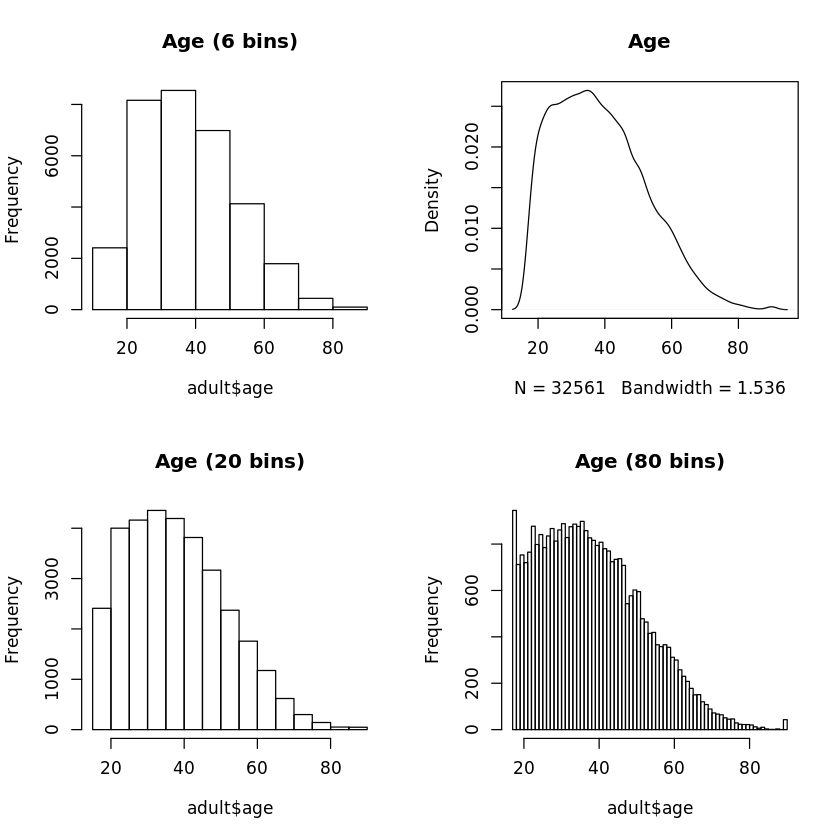

In [27]:
# Combine multiple plots
par(mfrow=c(2,2))

# Histograms and density plots
hist(adult$age, breaks=6, main="Age (6 bins)")
plot(density(adult$age), main="Age")
hist(adult$age, breaks=20, main="Age (20 bins)")
hist(adult$age, breaks=80, main="Age (80 bins)")

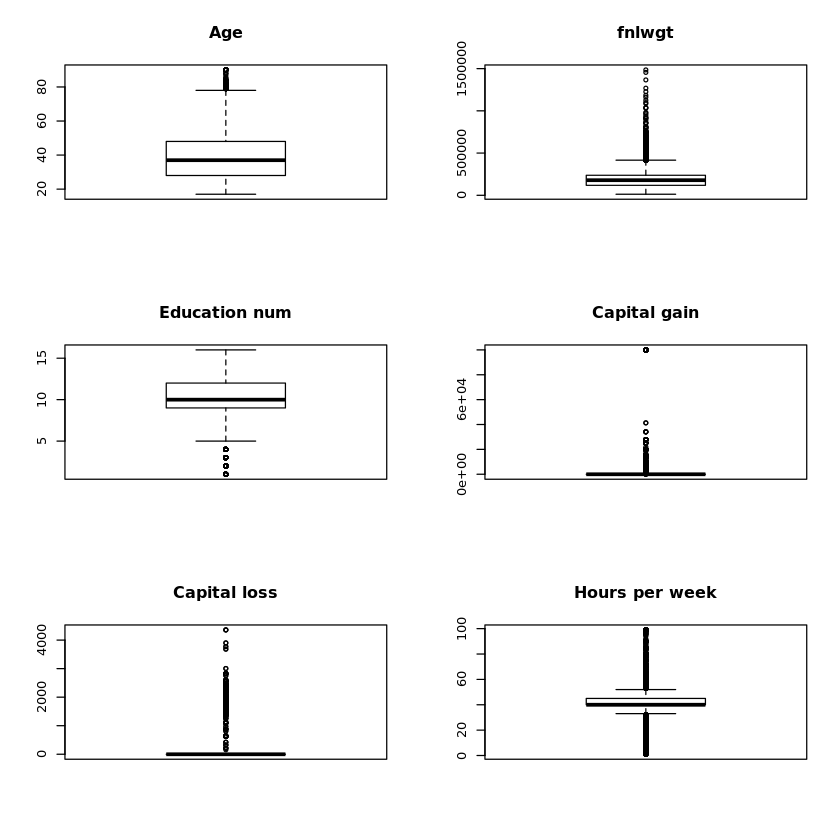

In [19]:
# Combine multiple plots
par(mfrow=c(3,2))

# Box plots
boxplot(adult$age, main="Age")
boxplot(adult$fnlwgt, main="fnlwgt")
boxplot(adult$'education_num', main="Education num")
boxplot(adult$'capital_gain', main="Capital gain")
boxplot(adult$'capital_loss', main="Capital loss")
boxplot(adult$'hours_per_week', main="Hours per week")

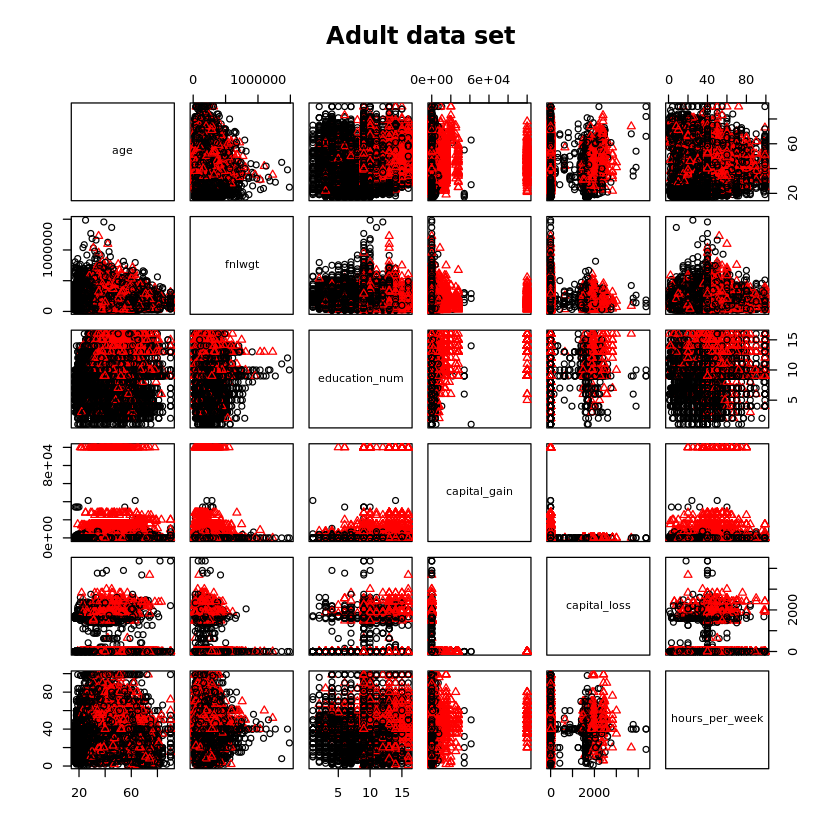

In [21]:
#pairs(~age+fnlwgt+education_num, data=adult, main="Adult data set")
pairs(adult[, ind], main="Adult data set", 
      col=adult$income, pch=as.numeric(adult$income))


## 2. Explicar las diferencias entre visualización de histogramas y densidad

En los histogramas hay agrupacion de los datos de acuerdo a intervalos sobre el dominio y el rango es la frecuencia de cada valor. El gráfico de densidad representa la distribución empirica de los datos sobre un dominio continuo.

## 3. ¿Cómo se podría resolver el problema de que un histograma dependa del número de bins?

Se podría definir la cantidad de bins como una función de la desviación estándar y el intervalo del dominio de los datos.

\begin{equation*}
\large
bins = \alpha \frac{|max - min|}{sd}
\end{equation*}

## 4. Comente sobre el uso de un boxplot (diagrama de caja) para explorar un conjunto de datos que tiene cuatro (4) variables: edad, peso, altura e ingresos.

Con los diagramas de agua se puede visualizar la dispersión de las variables para todo el conjunto o sobre grupos específicos de las otras variables. Por ejemplo, la dispersión del peso por rangos de ingresos.